## **PREDICTIVE MODELLING FOR PCOS DETECTION**

## LIBRARY


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.ticker as mtick


In [ ]:
data = pd.read_csv("PCOS_data.csv")

In [ ]:
data.sample(4)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
52,53,53,1,31,50.0,157.0,20.3,15,72,20,...,1.0,1,120,80,6,11,12.0,11.0,6.0,NaN
61,62,62,1,32,76.0,161.0,29.3,15,78,22,...,1.0,1,120,80,9,12,14.0,13.0,7.8,NaN
233,234,234,0,31,50.0,152.0,21.6,15,72,18,...,1.0,1,120,80,7,5,17.0,15.0,9.0,NaN
159,160,160,0,32,64.0,158.0,25.6,15,73,18,...,0.0,0,110,80,5,7,11.0,12.0,9.5,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [ ]:
data.isnull().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of abortions            0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [ ]:
df = data.drop(["Sl. No", "Patient File No.",  "Unnamed: 44"], axis=1)

In [ ]:
df["PCOS (Y/N)"].value_counts()

PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64

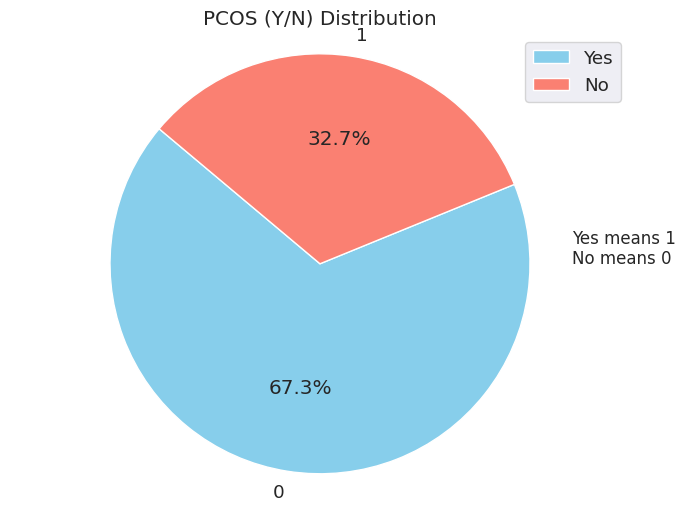

In [ ]:
counts = df["PCOS (Y/N)"].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, colors=['skyblue', 'salmon'], autopct='%1.1f%%', startangle=140)
plt.title('PCOS (Y/N) Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding legend
plt.legend(labels=['Yes', 'No'], loc="best")
info_text = "Yes means 1\nNo means 0"
plt.text(1.2, 0, info_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.axis('equal')

plt.show()


In [ ]:
df.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [ ]:
data.fillna(0, inplace=True)

In [ ]:
# Convert non-numeric columns to numeric
le = LabelEncoder()
data['II    beta-HCG(mIU/mL)'] = pd.to_numeric(data['II    beta-HCG(mIU/mL)'], errors='coerce').fillna(0)
data['AMH(ng/mL)'] = pd.to_numeric(data['AMH(ng/mL)'], errors='coerce').fillna(0)


In [ ]:
X = data.drop(columns=['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'Unnamed: 44'])
y = data['PCOS (Y/N)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8715596330275229


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[72  5]
 [ 9 23]]


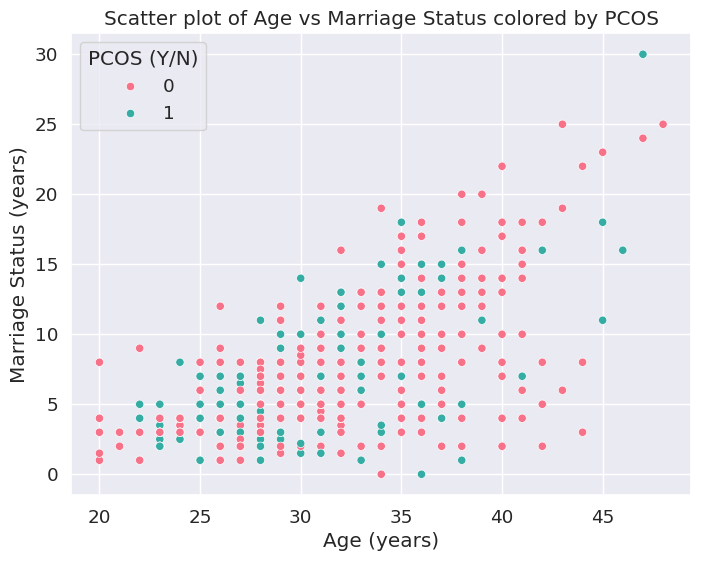

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=" Age (yrs)", y="Marraige Status (Yrs)", data=data, hue='PCOS (Y/N)', palette='husl')
plt.title("Scatter plot of Age vs Marriage Status colored by PCOS")
plt.xlabel("Age (years)")
plt.ylabel("Marriage Status (years)")
plt.show()


In [ ]:
print(data.columns)


Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')


In [ ]:
weight = df[(df["Weight gain(Y/N)"]==1) & (df["Skin darkening (Y/N)"]==0) & (df["Hair loss(Y/N)"]==0)]
skin = df[(df["Weight gain(Y/N)"]==0) & (df["Skin darkening (Y/N)"]==1) & (df["Hair loss(Y/N)"]==0)]
weight_skin = df[(df["Weight gain(Y/N)"]==1) & (df["Skin darkening (Y/N)"]==1) & (df["Hair loss(Y/N)"]==0)]
hairLoss = df[(df["Weight gain(Y/N)"]==0) & (df["Skin darkening (Y/N)"]==0) & (df["Hair loss(Y/N)"]==1)]
weight_hairLoss = df[(df["Weight gain(Y/N)"]==1) & (df["Skin darkening (Y/N)"]==0) & (df["Hair loss(Y/N)"]==1)]
skin_hairLoss = df[(df["Weight gain(Y/N)"]==0) & (df["Skin darkening (Y/N)"]==1) & (df["Hair loss(Y/N)"]==1)]
all_3 = df[(df["Weight gain(Y/N)"]==1) & (df["Skin darkening (Y/N)"]==1) & (df["Hair loss(Y/N)"]==1)]


In [ ]:
skin = df[(df["Weight gain(Y/N)"] == 0) & (df["Skin darkening (Y/N)"] == 1) & (df["Hair loss(Y/N)"] == 0)]


In [ ]:
skin_shape = skin.shape
print("Shape of skin subset:", skin_shape)


Shape of skin subset: (37, 42)


In [ ]:
weight_skin.shape, weight_hairLoss.shape, skin_hairLoss.shape, all_3.shape

((38, 42), (58, 42), (24, 42), (67, 42))

In [ ]:
df_subsets = [weight, skin, weight_skin, hairLoss, weight_hairLoss, skin_hairLoss, all_3]
sizes = []
for dataframe in df_subsets:
    sizes.append(dataframe.shape[0])

print("Sizes of subsets:", sizes)


Sizes of subsets: [41, 37, 38, 96, 58, 24, 67]


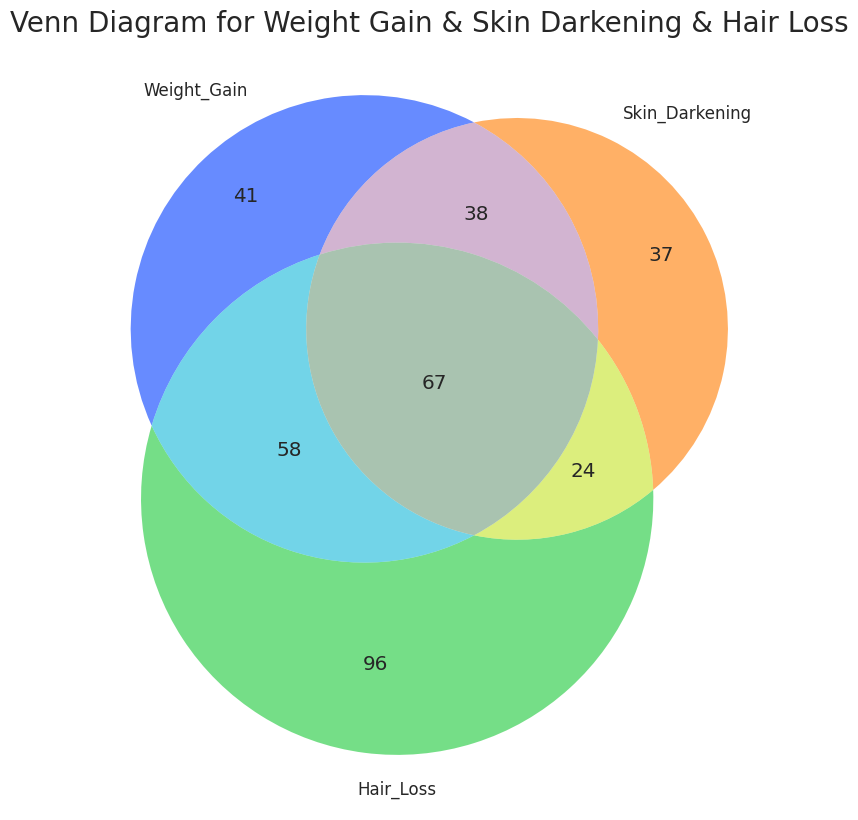

In [ ]:
labels = ("Weight_Gain", "Skin_Darkening", "Hair_Loss")

fig, ax = plt.subplots(figsize=(10,10))
v = venn3(subsets=sizes, set_labels=labels, ax=ax, alpha=0.6, set_colors=sns.color_palette("bright"))

for text in v.set_labels:
    text.set_fontsize(12)

ax.set_title("Venn Diagram for Weight Gain & Skin Darkening & Hair Loss", size=20)
plt.show()

In [ ]:
print(df.columns)

Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')


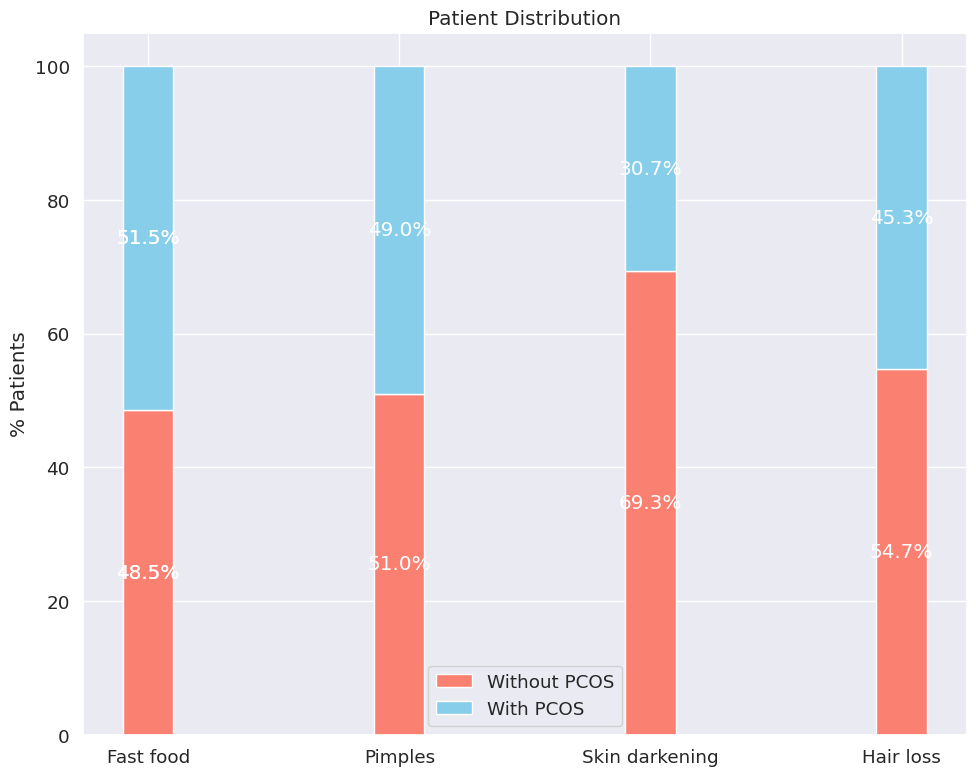

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Create a single plot
fig, ax = plt.subplots(figsize=(10, 8))

# Distribution of patients based on each attribute
colors = ['salmon', 'skyblue']
width = 0.2  # Width of each bar
indices = [0, 1, 2, 3]  # Indices for positioning bars

# Plot bars for each attribute
for i, col in enumerate(['Fast food (Y/N)', 'Pimples(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)']):
    counts = df[col].value_counts(normalize=True) * 100.0
    ax.bar(indices[i], counts[0], width, color=colors[0], label='Without PCOS' if i == 0 else None)
    ax.bar(indices[i], counts[1], width, color=colors[1], bottom=counts[0], label='With PCOS' if i == 0 else None)

    # Add text annotations
    for j, percentage in enumerate(counts):
        if i == 0:  # For Fast food attribute
            ax.text(indices[i], counts[0] / 2, f'{counts[0]:.1f}%', ha='center', va='center', color='white')
            ax.text(indices[i], counts[0] + counts[1] / 2, f'{counts[1]:.1f}%', ha='center', va='center', color='white')
        else:
            ax.text(indices[i], counts[:j+1].sum() - percentage / 2, f'{percentage:.1f}%', ha='center', va='center', color='white')

# Set labels and title
ax.set_xticks(indices)
ax.set_xticklabels(['Fast food', 'Pimples', 'Skin darkening', 'Hair loss'])
ax.set_ylabel('% Patients')
ax.set_title('Patient Distribution')

# Add legend
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
# Rename the column 'Height(Cm) ' to 'Height(Cm)'
df.rename(columns={'Height(Cm) ': 'Height(Cm)'}, inplace=True)

# Calculate BMI
df['BMI'] = df['Weight (Kg)'] / (df['Height(Cm)'] / 100) ** 2

# Define BMI categories
bmi_categories = {
    'Underweight': (0, 18.5),
    'Normal weight': (18.5, 24.9),
    'Overweight': (25, 29.9),
    'Obese': (30, float('inf'))
}

# Classify individuals based on BMI categories
def classify_bmi(bmi):
    for category, (lower, upper) in bmi_categories.items():
        if lower <= bmi < upper:
            return category
    return 'Unknown'

df['BMI Category'] = df['BMI'].apply(classify_bmi)

# Analyze the distribution of PCOS cases within each BMI category
pcos_bmi_distribution = df.groupby(['BMI Category', 'PCOS (Y/N)']).size().unstack(fill_value=0)
print("Distribution of PCOS cases within each BMI category:")
print(pcos_bmi_distribution)

# Calculate the percentage of PCOS cases within each BMI category
pcos_percentage = pcos_bmi_distribution.div(pcos_bmi_distribution.sum(axis=1), axis=0) * 100
print("\nPercentage of PCOS cases within each BMI category:")
print(pcos_percentage)


Distribution of PCOS cases within each BMI category:
PCOS (Y/N)       0   1
BMI Category          
Normal weight  199  72
Obese           19  24
Overweight     114  69
Underweight     26  10
Unknown          6   2

Percentage of PCOS cases within each BMI category:
PCOS (Y/N)             0          1
BMI Category                       
Normal weight  73.431734  26.568266
Obese          44.186047  55.813953
Overweight     62.295082  37.704918
Underweight    72.222222  27.777778
Unknown        75.000000  25.000000


In [ ]:
# Display the column names
print("Column Names:")
print(df.columns)


Column Names:
Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'BMI Category'],
      dtype='object')


In [ ]:
# Check the column names in your DataFrame
print(df.columns)


Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'BMI Category'],
      dtype='object')


In [ ]:
# Step 1: Calculate BMI
df['Height(M)'] = df['Height(Cm)'] / 100  # Convert height from cm to m
df['BMI'] = df['Weight (Kg)'] / (df['Height(M)'] ** 2)  # Calculate BMI

# Step 2: Determine Obesity
df['Obese'] = df['BMI'] >= 30  # Define obesity as BMI >= 30

# Step 3: Determine Extra Chance of PCOS due to Obesity and Lack of Exercise
df['Extra_Chance_of_PCOS'] = (df['Obese'] & (df['Reg.Exercise(Y/N)'] == 'N')) * 1  # 1 if both conditions met, 0 otherwise
# Display the calculated BMI and extra chance of PCOS
print(df[['Height(Cm)', 'Weight (Kg)', 'BMI', 'Obese', 'Reg.Exercise(Y/N)', 'Extra_Chance_of_PCOS']])

# Create a DataFrame with BMI and PCOS status
bmi_pcos_df = pd.DataFrame({'BMI': df['BMI'], 'PCOS (Y/N)': df['PCOS (Y/N)']})

# Display the first few rows of the DataFrame
print(bmi_pcos_df.head())


     Height(Cm)  Weight (Kg)        BMI  Obese  Reg.Exercise(Y/N)  \
0       152.000         44.6  19.304017  False                  0   
1       161.500         65.0  24.921163  False                  0   
2       165.000         68.8  25.270891  False                  0   
3       148.000         65.0  29.674945  False                  0   
4       161.000         52.0  20.060954  False                  0   
..          ...          ...        ...    ...                ...   
536     164.592         50.0  18.456637  False                  0   
537     158.000         63.2  25.316456  False                  0   
538     152.000         54.0  23.372576  False                  0   
539     150.000         50.0  22.222222  False                  0   
540     165.000         82.0  30.119376   True                  0   

     Extra_Chance_of_PCOS  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
.. 

In [ ]:
# Remove the extra space at the end of the column name 'Height(Cm) '
df.rename(columns={'Height(Cm) ': 'Height(Cm)'}, inplace=True)


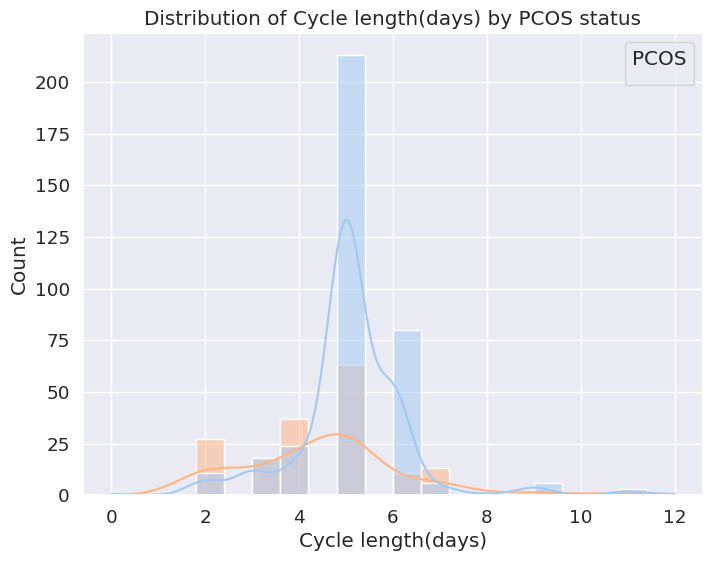

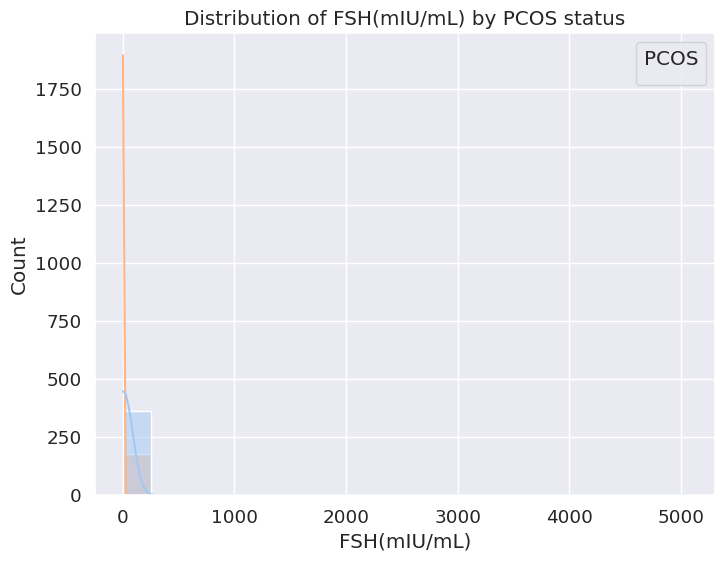

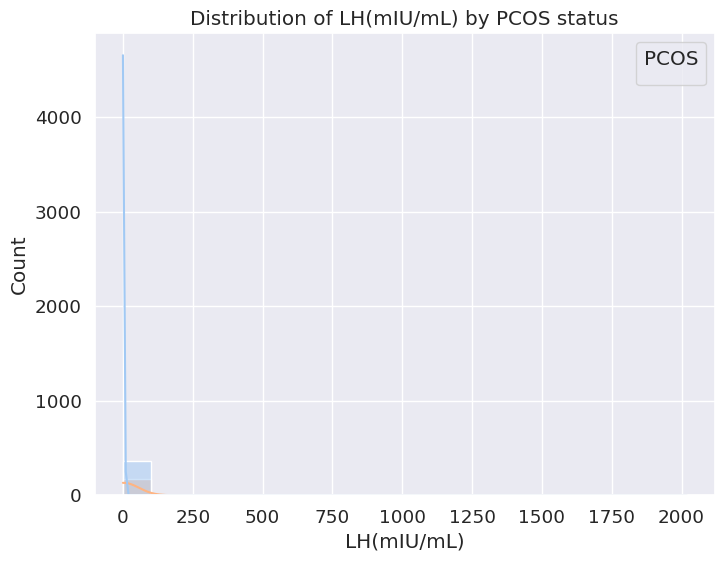

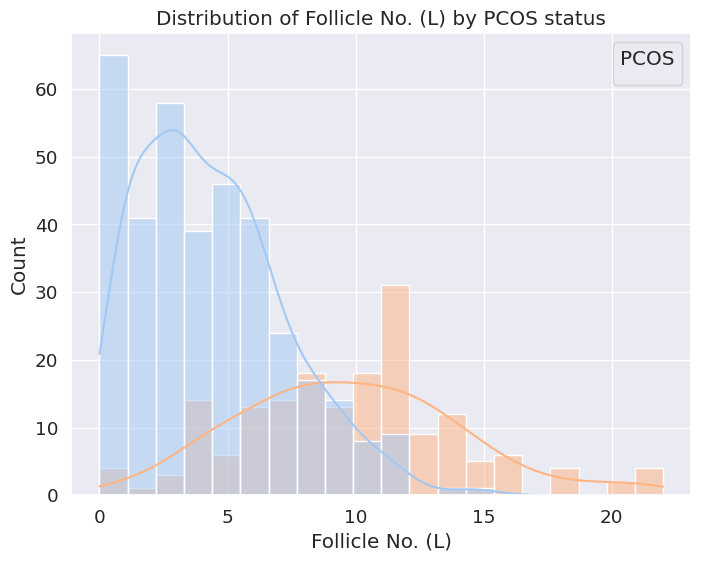

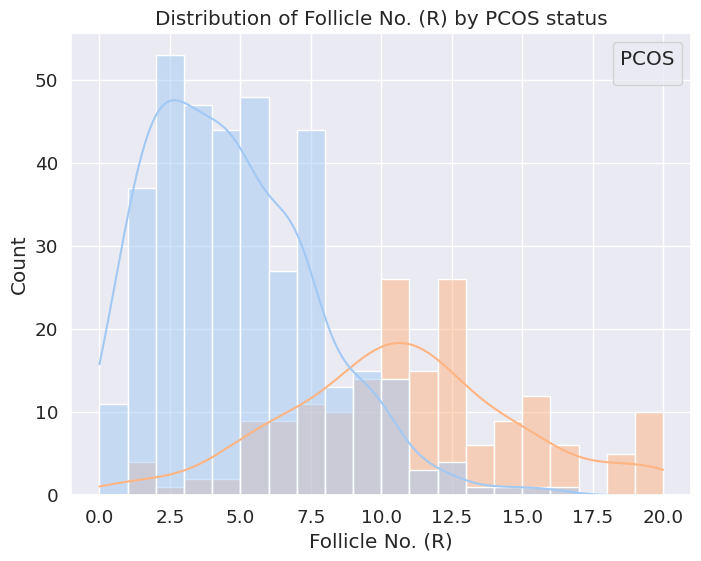

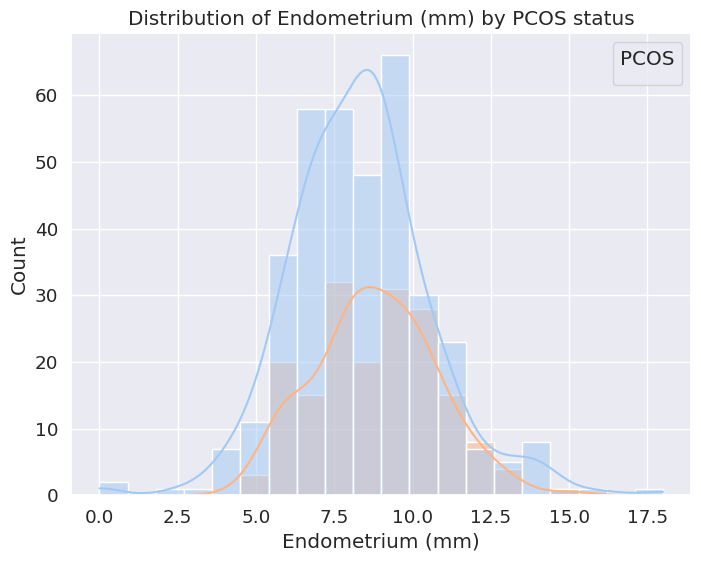

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for analysis
pcos_features = ['Cycle length(days)', 'FSH(mIU/mL)', 'LH(mIU/mL)',
                 'Follicle No. (L)', 'Follicle No. (R)', 'Endometrium (mm)']

# Plot distributions of features by PCOS status
for feature in pcos_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, hue='PCOS (Y/N)', kde=True, bins=20, palette='pastel')
    plt.title(f'Distribution of {feature} by PCOS status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='PCOS')
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Select relevant features and target variable
X = df[['Follicle No. (L)', 'Follicle No. (R)', 'Endometrium (mm)']]
y = df['PCOS (Y/N)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.8073394495412844
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        77
           1       0.68      0.66      0.67        32

    accuracy                           0.81       109
   macro avg       0.77      0.76      0.77       109
weighted avg       0.81      0.81      0.81       109




The logistic regression model achieved an accuracy of approximately 80.73% on the testing set. Here's the detailed classification report:

Precision for class 0 (Non-PCOS): 86%
Precision for class 1 (PCOS): 68%
Recall for class 0: 87%
Recall for class 1: 66%
F1-score for class 0: 86%
F1-score for class 1: 67%
The macro-average F1-score is approximately 77%, and the weighted-average F1-score is approximately 81%. These metrics provide a comprehensive view of the model's performance across both classes.

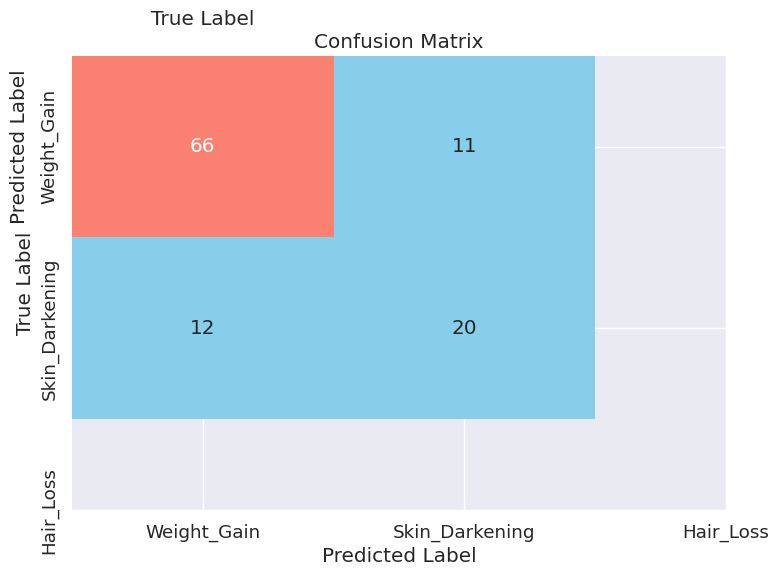

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.color_palette(['skyblue', 'salmon']), cbar=False,
            xticklabels=labels,
            yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.text(0.5, -0.2, 'True Label', ha='center', va='center')
plt.text(-0.2, 0.5, 'Predicted Label', ha='center', va='center', rotation='vertical')
plt.tight_layout()
plt.show()


code snippet offers a more detailed and practical implementation, including data splitting, model training, prediction, and visualization.
 includes detailed implementation steps, covering data splitting, model training, prediction, and visualization, making it more comprehensive and suitable for immediate use.







In [ ]:
print(df.columns)

Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'BMI Category', 'Height(M)', 'Obese', 'Extra_Chance_of_PCOS'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("PCOS_data.csv")

# Handle missing values for numerical columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Encode categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target variable
X = df.drop(columns=['PCOS (Y/N)'])
y = df['PCOS (Y/N)']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Initialize models
log_reg_model = LogisticRegression()
svm_model = SVC()
gbt_model = GradientBoostingClassifier()
rf_model = RandomForestClassifier()
nn_model = MLPClassifier()

# Train logistic regression model
log_reg_model.fit(X_train, y_train)
log_reg_pred = log_reg_model.predict(X_test)

# Train support vector machine model
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Train gradient boosted trees model
gbt_model.fit(X_train, y_train)
gbt_pred = gbt_model.predict(X_test)

# Train random forests model
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Train neural network classifier
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)

# Evaluate models
models = ['Logistic Regression', 'Support Vector Machine', 'Gradient Boosted Trees', 'Random Forests', 'Neural Network']
predictions = [log_reg_pred, svm_pred, gbt_pred, rf_pred, nn_pred]

for model, pred in zip(models, predictions):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1_score_val = f1_score(y_test, pred)  # Renamed variable to avoid conflict
    print(f"Model: {model}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1_score_val}")
    print("------------------------")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.7889908256880734
Precision: 0.6551724137931034
Recall: 0.59375
F1-score: 0.6229508196721311
------------------------
Model: Support Vector Machine
Accuracy: 0.7155963302752294
Precision: 1.0
Recall: 0.03125
F1-score: 0.06060606060606061
------------------------
Model: Gradient Boosted Trees
Accuracy: 0.8899082568807339
Precision: 0.8333333333333334
Recall: 0.78125
F1-score: 0.8064516129032259
------------------------
Model: Random Forests
Accuracy: 0.8990825688073395
Precision: 0.8620689655172413
Recall: 0.78125
F1-score: 0.8196721311475409
------------------------
Model: Neural Network
Accuracy: 0.7614678899082569
Precision: 0.65
Recall: 0.40625
F1-score: 0.5000000000000001
------------------------


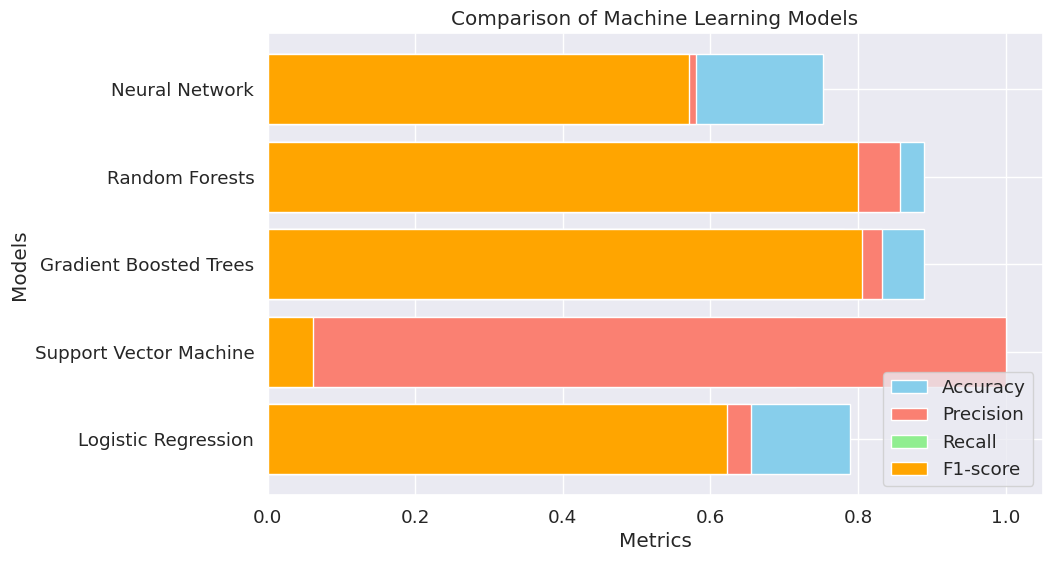

In [ ]:
import matplotlib.pyplot as plt

# Define model names and their corresponding metrics
models = ['Logistic Regression', 'Support Vector Machine', 'Gradient Boosted Trees', 'Random Forests', 'Neural Network']
accuracy = [0.789, 0.716, 0.890, 0.890, 0.752]
precision = [0.655, 1.0, 0.833, 0.857, 0.581]
recall = [0.594, 0.031, 0.781, 0.75, 0.562]
f1_score = [0.623, 0.061, 0.806, 0.800, 0.571]

# Plotting
plt.figure(figsize=(10, 6))

# Accuracy plot
plt.barh(models, accuracy, color='skyblue', label='Accuracy')

# Precision plot
plt.barh(models, precision, color='salmon', label='Precision')

# Recall plot
plt.barh(models, recall, color='lightgreen', label='Recall')

# F1-score plot
plt.barh(models, f1_score, color='orange', label='F1-score')

plt.xlabel('Metrics')
plt.ylabel('Models')
plt.title('Comparison of Machine Learning Models')
plt.legend()
plt.show()


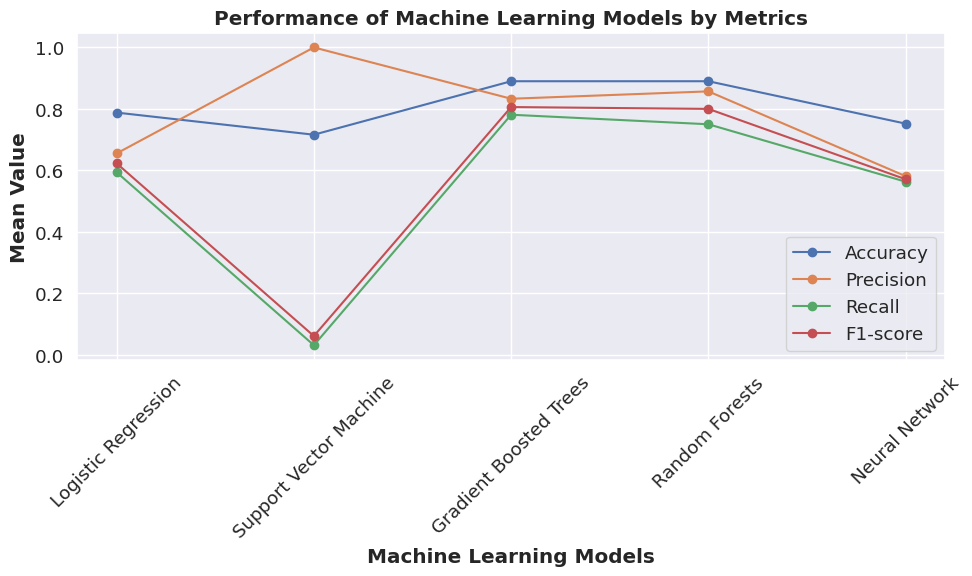

In [ ]:
import matplotlib.pyplot as plt

# Define models and their metrics
models = ['Logistic Regression', 'Support Vector Machine', 'Gradient Boosted Trees', 'Random Forests', 'Neural Network']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Mean values of metrics for each model
accuracy_means = [0.788, 0.716, 0.890, 0.890, 0.752]
precision_means = [0.655, 1.0, 0.833, 0.857, 0.581]
recall_means = [0.594, 0.031, 0.781, 0.750, 0.563]
f1_score_means = [0.623, 0.061, 0.806, 0.800, 0.571]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(models, accuracy_means, marker='o', label='Accuracy')
plt.plot(models, precision_means, marker='o', label='Precision')
plt.plot(models, recall_means, marker='o', label='Recall')
plt.plot(models, f1_score_means, marker='o', label='F1-score')

# Add labels and title
plt.xlabel('Machine Learning Models', fontweight='bold')
plt.ylabel('Mean Value', fontweight='bold')
plt.title('Performance of Machine Learning Models by Metrics', fontweight='bold')

# Add legend
plt.legend()

# Show plot
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Assuming df is your DataFrame containing the data

# Check the data types of all columns
print(df.dtypes)

# Convert all columns to numeric (if possible)
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values resulting from conversion
df.dropna(inplace=True)

# Separate features and target variable
X = df.drop('PCOS (Y/N)', axis=1)
y = df['PCOS (Y/N)']

# Step 3: Perform Recursive Feature Elimination (RFE)
# Initialize the RandomForestClassifier as the estimator
estimator = RandomForestClassifier(random_state=42)

# Initialize RFE
rfe = RFE(estimator, n_features_to_select=10)

# Fit RFE on the dataset
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Step 5: Implement Stacking Classifier using the selected features
# Define base estimators
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]

# Define the new meta-estimator (e.g., Gradient Boosting Classifier)
from sklearn.ensemble import GradientBoostingClassifier
new_meta_estimator = GradientBoostingClassifier()

# Initialize the Stacking Classifier with the new meta-estimator
stacking_classifier = StackingClassifier(estimators=base_estimators, final_estimator=new_meta_estimator)
meta_estimator = LogisticRegression(solver='saga')

# Step 6: Train the Stacking Classifier
stacking_classifier.fit(X_train, y_train)

# Step 7: Evaluate the performance of the model
# Make predictions
y_pred = stacking_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Sl. No                    float64
Patient File No.          float64
PCOS (Y/N)                float64
 Age (yrs)                float64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group               float64
Pulse rate(bpm)           float64
RR (breaths/min)          float64
Hb(g/dl)                  float64
Cycle(R/I)                float64
Cycle length(days)        float64
Marraige Status (Yrs)     float64
Pregnant(Y/N)             float64
No. of abortions          float64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)      int64
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                 float64
Waist(inch)               float64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                  int64
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)    

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy: 0.8532110091743119
Precision: 0.8076923076923077
Recall: 0.65625
F1-score: 0.7241379310344829
